데이터 불러오기

In [17]:
import pandas as pd

file_path = r"D:\논문\스터디_1주차_타이타닉_데이터분석(ML)\데이터\train.csv"

train_df = pd.read_csv(file_path)
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Train 정보 확인

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
column_list = list(train_df.columns)
print(column_list)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [23]:
# 각 column의 고유값 확인
for column in column_list:
    print(f'{column} types : ', train_df[column].nunique())

PassengerId types :  891
Survived types :  2
Pclass types :  3
Name types :  891
Sex types :  2
Age types :  88
SibSp types :  7
Parch types :  7
Ticket types :  681
Fare types :  248
Cabin types :  147
Embarked types :  3


In [38]:
train_df["Title"] = train_df["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()
# [성][호칭][이름]에서 호칭 추출

In [39]:
# 열 리스트 가져오기
cols = list(train_df.columns)

# 'Title'을 빼고, 'Pclass' 다음 위치에 삽입
cols.insert(cols.index('Pclass') + 1, cols.pop(cols.index('Title')))

# 열 순서 재정렬
train_df = train_df[cols]


In [43]:
def age_label(age):
    if pd.isnull(age):  # 결측값 처리
        return None
    elif age <= 7:
        return 0  # 어린이
    elif age <= 15:
        return 1  # 청소년
    elif age <= 30:
        return 2  # 청년
    elif age <= 50:
        return 3  # 장년
    else:
        return 4  # 노년

# 새로운 열 추가
train_df["AgeGroup"] = train_df["Age"].apply(age_label)

C:\Users\user\AppData\Local\Temp\ipykernel_3580\3394282486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["AgeGroup"] = train_df["Age"].apply(age_label)


In [45]:
train_df["AgeGroup"]

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    2.0
888    NaN
889    2.0
890    3.0
Name: AgeGroup, Length: 891, dtype: float64

In [ ]:
train_df["AgeGroup"] = train_df["AgeGroup"].astype('Int64') # 정수형으로 변경


C:\Users\user\AppData\Local\Temp\ipykernel_3580\3751635875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["AgeGroup"] = train_df["AgeGroup"].astype('Int64')


In [50]:
train_df["AgeGroup"]

0         2
1         3
2         2
3         3
4         3
       ... 
886       2
887       2
888    <NA>
889       2
890       3
Name: AgeGroup, Length: 891, dtype: Int64

In [51]:
# 열 리스트 가져오기
cols = list(train_df.columns)

# 'AgeGroup'을 빼고, 'Age' 다음 위치에 삽입
cols.insert(cols.index('Age') + 1, cols.pop(cols.index('AgeGroup')))

# 열 순서 재정렬
train_df = train_df[cols]

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Title        891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   AgeGroup     714 non-null    Int64  
 8   SibSp        891 non-null    int64  
 9   Parch        891 non-null    int64  
 10  Ticket       891 non-null    object 
 11  Fare         891 non-null    float64
 12  Cabin        204 non-null    object 
 13  Embarked     889 non-null    object 
dtypes: Int64(1), float64(2), int64(5), object(6)
memory usage: 98.5+ KB


In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,AgeGroup,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,"Braund, Mr. Owen Harris",male,22.0,2,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,"Heikkinen, Miss. Laina",female,26.0,2,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,3,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,"Allen, Mr. William Henry",male,35.0,3,0,0,373450,8.0500,NaN,S


EDA 분석

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

column_list = list(train_df.columns) # 추가된 열 업데이트
table_rows = []

for col in column_list:
    filtered = train_df[train_df['Survived'] == target_value]
    proportion = (filtered[col].value_counts(normalize=True) * 100).round(2)

    for category, percent in proportion.items():
        table_rows.append({
            'Feature': col,
            'Category': category,
            'Survived %': f'{percent:.2f}%'
        })

# DataFrame으로 정리
summary_df = pd.DataFrame(table_rows)
summary_df

,Feature,Category,Survived %
0,PassengerId,890,0.29%
1,PassengerId,2,0.29%
2,PassengerId,3,0.29%
3,PassengerId,4,0.29%
4,PassengerId,9,0.29%
...,...,...,...
1295,Cabin,B42,0.74%
1296,Cabin,C148,0.74%
1297,Embarked,S,63.82%
1298,Embarked,C,27.35%


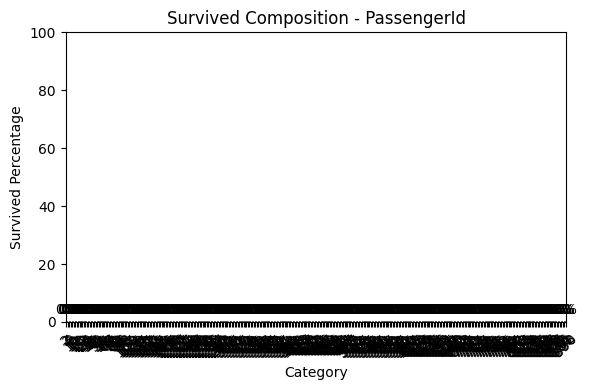

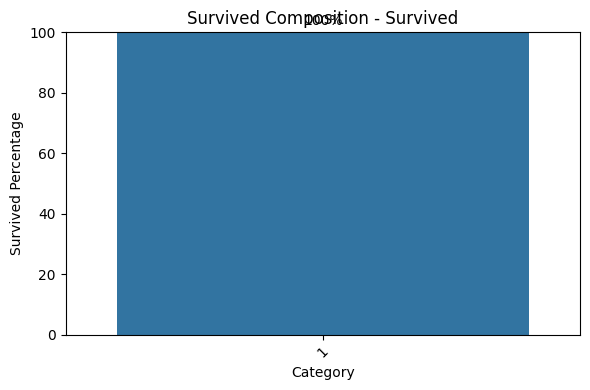

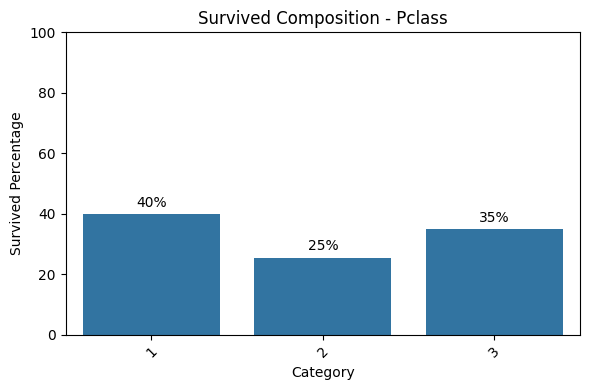

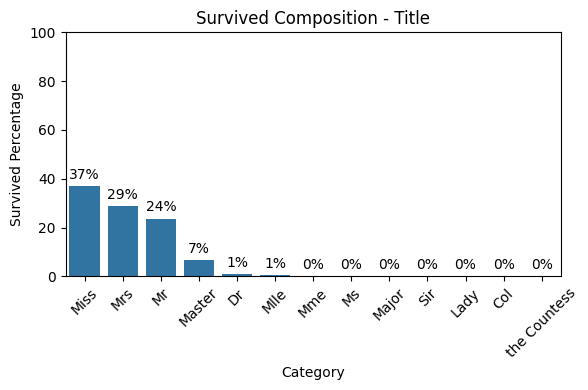

C:\Users\user\AppData\Local\Temp\ipykernel_3580\21819881.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


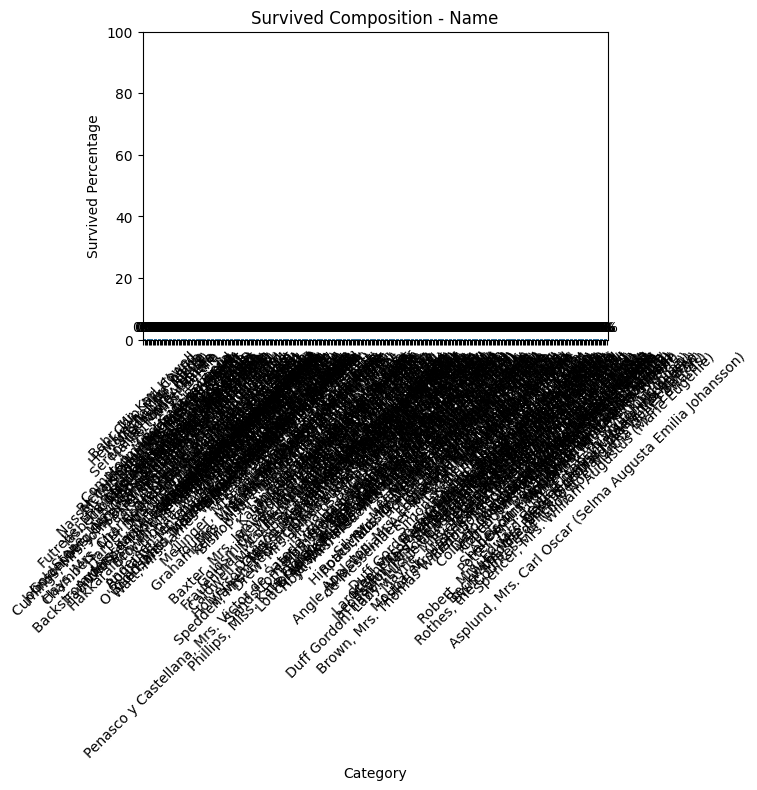

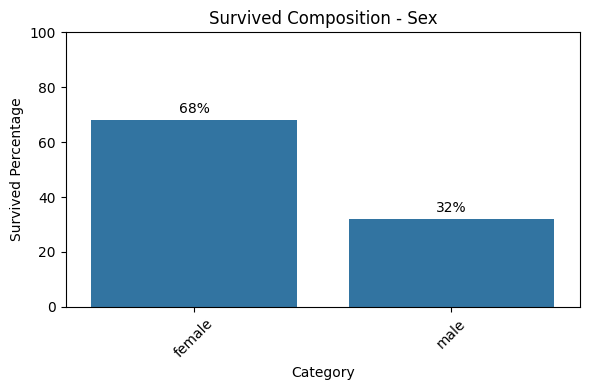

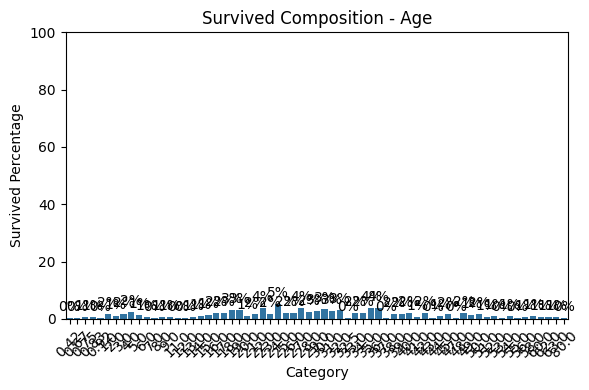

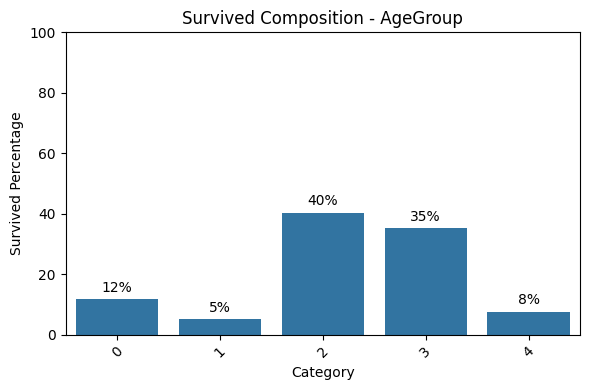

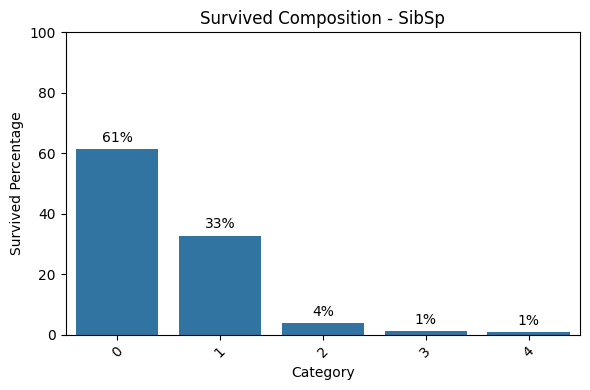

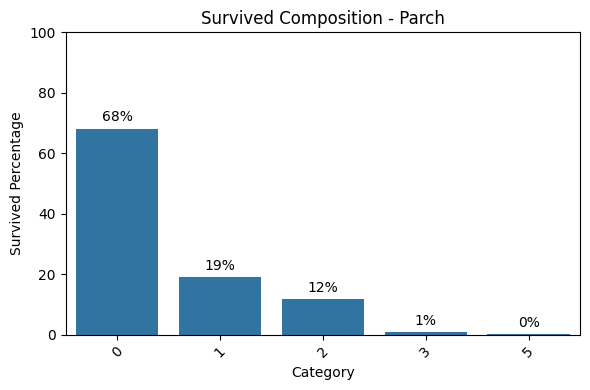

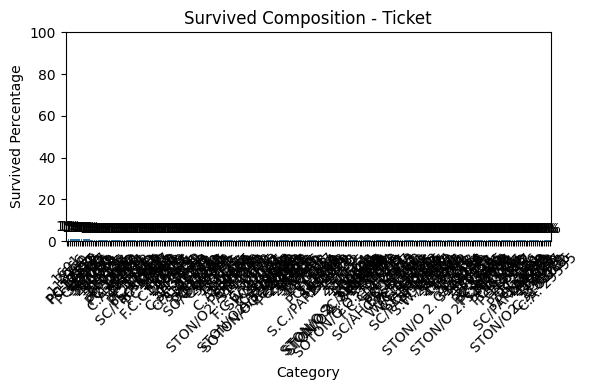

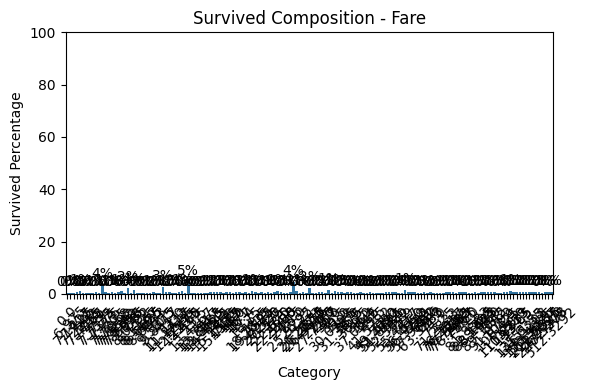

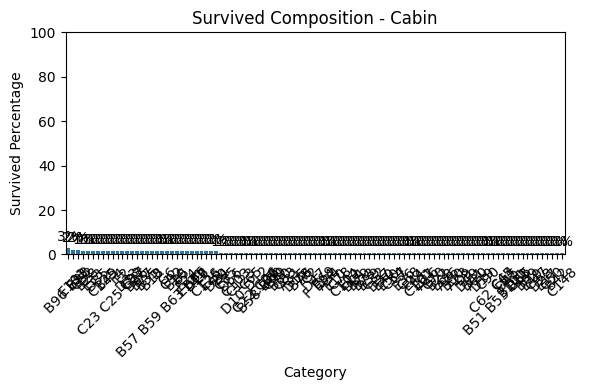

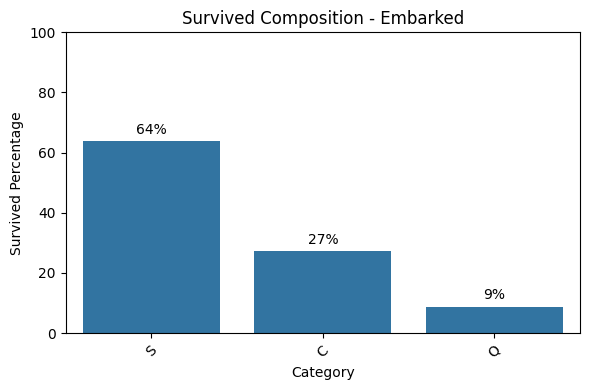

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# 퍼센트 수치를 숫자로 변환
summary_df['Survived % (num)'] = summary_df['Survived %'].str.replace('%', '').astype(float)

# Feature별로 개별 barplot + 숫자 표시
features = summary_df['Feature'].unique()

for feature in features:
    subset = summary_df[summary_df['Feature'] == feature]
    
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=subset, x='Category', y='Survived % (num)')
    plt.title(f'Survived Composition - {feature}')
    plt.ylabel('Survived Percentage')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)

    # 막대 위에 숫자(label) 표시
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

    plt.tight_layout()
    plt.show()
